[[ 0.10291054]]
[[ 0.09706383]]


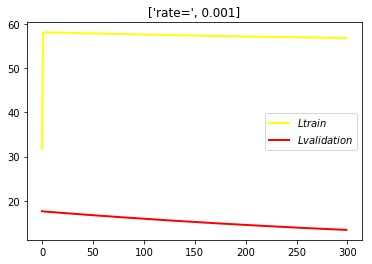

In [46]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file

mem = Memory("./mycache")

@mem.cache
def get_data():
    data = load_svmlight_file("C:/Users/her/Desktop/au.txt")
    return data[0], data[1]

X, y = get_data()
X = X.todense()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from numpy import *
w = mat(random.rand(14,1))
b=np.random.normal()

c = 0.1
def loss(x,y):
    b1 = mat(b)
    w1 = vstack((w, b1))
    w2=(w.T)*w/2
    a = len(x)
    k = mat(ones((a, 1)))
    x1 = hstack((x, k))
    t1 = x1*w1
    t2 = t1
    for i in range(a):
        t1[i,0]=1-y[i]*t1[i,0]
    for i in range(a):
        t2[i,0]=max(0,t1[i,0])
    w3 = 0
    for i in range(a):
        w3+ = t2[i,0]
    return w2+c*w3

def gw(x,y):
    b1 = mat(b)
    w1 = vstack((w, b1))
    a = len(x)
    k = mat(ones((a, 1)))
    x1 = hstack((x, k))
    t1 = x1 * w1
    x2 = x
    x3 = x
    for i in range(a):
        t1[i, 0] = 1 - y[i] * t1[i, 0]
        if(t1[i,0]>=0):
            x2[i]=-y[i]*x[i]
        else:
            x2[i]=0*x[i]
    x3[0]=0*x3[0]
    for i in range(a):
        x3[0]+=x2[i]
    return x3[0]

def gb(x,y):
    b1 = mat(b)
    w1 = vstack((w, b1))
    a = len(x)
    k = mat(ones((a, 1)))
    x1 = hstack((x, k))
    t1 = x1 * w1
    y2=y
    for i in range(a):
        t1[i, 0] = 1 - y[i] * t1[i, 0]
        if (t1[i, 0] >= 0):
            y2[i]=-y[i]
        else:
            y2[i]=0
    y1=0
    for i in range(a):
        y1+=y2[i]
    return y1


def gradient_w(x,y):
    return w.T+c*gw(x,y)

def gradient_b(x,y):
    return c*gb(x,y)


rate=0.001
listx=[]
listy=[]
listz=[]

for i in range(300):
    w_t = w.T
    w_t = w_t-rate*gradient_w(X_train,y_train)
    b = b-rate*gradient_b(X_train,y_train)
    w = w_t.T
    listx.append(i)
    a1 = loss(X_train, y_train)
    a2 = array(a1)
    listy.append(a2[0][0])
    b1 = loss(X_test, y_test)
    b2 = array(b1)
    listz.append(b2[0][0])
    
print(loss(X_train,y_train)/len(X_train))
print(loss(X_test,y_test)/len(X_test))

plt.figure('model')
plt.plot(listx, listy, label="$Ltrain$", color="yellow")
# plt.figure('losstest')
plt.plot(listx, listz, label="$Lvalidation$", color="red")
plt.title(["rate=", rate])
plt.legend()
plt.show()